In [1]:
import model1125

In [2]:
    data_path = "H-1B_2017.csv"
    mo = model1125.Model(data_path)

In [3]:
    X_train, X_test, y_train, y_test = mo.get_data()

/home/ji/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (14,15,16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ji/Downloads/create_features_DF1125.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['CASE_STATUS'] = (df['CASE_STATUS'] == 'DENIED').astype(int)


In [5]:
X_train.head().T

,458202,210107,19604,442735,577271
CASE_NUMBER,I-200-17123-525093,I-200-17052-122343,I-200-16287-728135,I-200-17110-455846,I-200-17223-470571
CASE_STATUS,0,0,0,0,0
CASE_SUBMITTED,05/03/2017,02/27/2017,10/14/2016,04/20/2017,08/14/2017
DECISION_DATE,05/09/2017,03/03/2017,10/20/2016,04/26/2017,08/18/2017
VISA_CLASS,H-1B,H-1B,H-1B,H-1B,H-1B
EMPLOYMENT_START_DATE,05/15/2017,08/24/2017,10/14/2016,04/27/2017,08/18/2017
EMPLOYMENT_END_DATE,05/14/2020,08/23/2020,10/12/2019,04/27/2020,08/17/2020
EMPLOYER_NAME,"INFO LABS, INC.","BOCOUP, LLC",TATA CONSULTANCY SERVICES LIMITED,"CONCEPTS INFORMATION TECHNOLOGY, INC",DELOITTE CONSULTING LLP
EMPLOYER_BUSINESS_DBA,NaN,NaN,NaN,NaN,NaN
EMPLOYER_ADDRESS,690 CENTER STREET,201 SOUTH STREET,9201 CORPORATE BOULEVARD,8230 BOONE BOULEVARD,1700 MARKET STREET


In [5]:
X_train.WAGE_UNIT_OF_PAY.value_counts()

Year         355205
Hour          23160
Month           257
Week             91
Bi-Weekly        58
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [6]:
X_train.groupby('WAGE_UNIT_OF_PAY')['WAGE_RATE_OF_PAY_FROM'].describe()

,count,mean,std,min,25%,50%,75%,max
WAGE_UNIT_OF_PAY,,,,,,,,
Bi-Weekly,58.0,5888.564828,18820.251475,700.00,2043.975,2480.00,3737.5775,145000.0
Hour,23160.0,81.838115,1938.163309,7.25,26.280,32.68,41.4100,117807.0
Month,257.0,6337.711984,5979.947281,1500.00,3500.000,4800.00,6668.1300,71470.0
Week,91.0,2791.912418,9835.709238,450.00,900.000,1298.00,1639.0000,75000.0
Year,355205.0,88126.330123,36917.470174,0.00,65000.000,78582.00,100000.0000,1688000.0


In [7]:
unitpay_to_num = {"Year":1, "Hour": 2080, "Month": 12, "Bi-Weekly": 26, "Week": 52}
X_train["MULTIPLIER"] = X_train["WAGE_UNIT_OF_PAY"].map(unitpay_to_num)
X_train["ACTUAL_SALARY"] = X_train["WAGE_RATE_OF_PAY_FROM"] * X_train["MULTIPLIER"]

In [8]:
X_train.groupby('WAGE_UNIT_OF_PAY')['ACTUAL_SALARY'].describe()

,count,mean,std,min,25%,50%,75%,max
WAGE_UNIT_OF_PAY,,,,,,,,
Bi-Weekly,58.0,153102.685517,4.893265e+05,18200.0,53143.35,64480.0,97177.015,3770000.0
Hour,23160.0,170223.279793,4.031380e+06,15080.0,54662.40,67974.4,86132.800,245038560.0
Month,257.0,76052.543813,7.175937e+04,18000.0,42000.00,57600.0,80017.560,857640.0
Week,91.0,145179.445714,5.114569e+05,23400.0,46800.00,67496.0,85228.000,3900000.0
Year,355205.0,88126.330123,3.691747e+04,0.0,65000.00,78582.0,100000.000,1688000.0


In [30]:
import pandas as pd
bins = [10000, 20000, 30000, 40000, 50000, 60000, 200000,1000000000]
labels = [1,2,3,4,5,6,7]
X_train['binned'] = pd.cut(X_train['ACTUAL_SALARY'], bins=bins, labels=labels)

In [31]:
X_train.binned.value_counts()

6    314287
5     40186
4     14350
7      5088
3      4226
2       563
1        70
Name: binned, dtype: int64

In [32]:
X_train.binned.count()

378770

In [33]:
X_train.ACTUAL_SALARY.describe()

count    3.787710e+05
mean     9.316162e+04
std      9.977273e+05
min      0.000000e+00
25%      6.500000e+04
50%      7.790300e+04
75%      1.000000e+05
max      2.450386e+08
Name: ACTUAL_SALARY, dtype: float64

In [34]:
X_train.head().T

,458202,210107,19604,442735,577271
CASE_NUMBER,I-200-17123-525093,I-200-17052-122343,I-200-16287-728135,I-200-17110-455846,I-200-17223-470571
CASE_STATUS,0,0,0,0,0
CASE_SUBMITTED,05/03/2017,02/27/2017,10/14/2016,04/20/2017,08/14/2017
DECISION_DATE,05/09/2017,03/03/2017,10/20/2016,04/26/2017,08/18/2017
VISA_CLASS,H-1B,H-1B,H-1B,H-1B,H-1B
EMPLOYMENT_START_DATE,05/15/2017,08/24/2017,10/14/2016,04/27/2017,08/18/2017
EMPLOYMENT_END_DATE,05/14/2020,08/23/2020,10/12/2019,04/27/2020,08/17/2020
EMPLOYER_NAME,"INFO LABS, INC.","BOCOUP, LLC",TATA CONSULTANCY SERVICES LIMITED,"CONCEPTS INFORMATION TECHNOLOGY, INC",DELOITTE CONSULTING LLP
EMPLOYER_BUSINESS_DBA,NaN,NaN,NaN,NaN,NaN
EMPLOYER_ADDRESS,690 CENTER STREET,201 SOUTH STREET,9201 CORPORATE BOULEVARD,8230 BOONE BOULEVARD,1700 MARKET STREET


Text(0,0.5,'rejection rate')

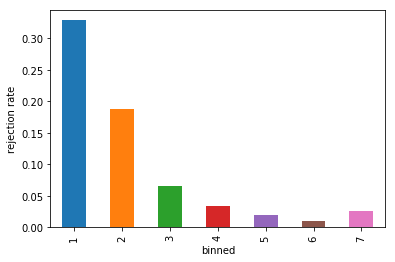

In [35]:
agg = X_train.groupby('binned')['CASE_STATUS'].mean()
agg.plot(kind='bar').set_ylabel('rejection rate')

In [36]:
X_train.binned.value_counts()

6    314287
5     40186
4     14350
7      5088
3      4226
2       563
1        70
Name: binned, dtype: int64

In [4]:
X, df_save_em, df_save_so = model1125.create_features_df(X_train, predict=False)

/home/ji/Downloads/create_features_DF1125.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["MULTIPLIER"] = df["WAGE_UNIT_OF_PAY"].map(unitpay_to_num)
/home/ji/Downloads/create_features_DF1125.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["ACTUAL_SALARY"] = df["WAGE_RATE_OF_PAY_FROM"] * df["MULTIPLIER"]
/home/ji/Downloads/create_features_DF1125.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [5]:
X.head()

,CASE_STATUS,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR,EMPLOYER_NAME,EMPLOYER_RATE,per_employer,SOC_NAME,SOC_RATE,per_soc,...,UNIT_Month,UNIT_Week,UNIT_Year,WAGE_1,WAGE_2,WAGE_3,WAGE_4,WAGE_5,WAGE_6,WAGE_7
458202,0,1,1,0,"INFO LABS, INC.",0.000000,18.0,COMPUTER SYSTEMS ANALYSTS,0.009345,58427,...,0,0,1,0,0,0,0,0,1,0
210107,0,1,0,0,"BOCOUP, LLC",0.034285,3.0,GRAPHIC DESIGNERS,0.031153,1284,...,0,0,1,0,0,0,0,0,1,0
19604,0,1,1,0,TATA CONSULTANCY SERVICES LIMITED,0.002458,9359.0,COMPUTER PROGRAMMERS,0.008761,40751,...,0,0,1,0,0,0,0,0,1,0
442735,0,0,1,0,"CONCEPTS INFORMATION TECHNOLOGY, INC",0.000000,34.0,COMPUTER SYSTEMS ANALYSTS,0.009345,58427,...,0,0,0,0,0,0,0,0,1,0
577271,0,1,0,0,DELOITTE CONSULTING LLP,0.021560,4963.0,COMPUTER AND INFORMATION SYSTEMS MANAGERS,0.014541,4195,...,0,0,1,0,0,0,0,0,1,0


In [7]:
X_test.head().T

,222268,422385,564464,6090,403535
CASE_NUMBER,I-200-17060-699327,I-200-17094-230147,I-200-17214-302095,I-200-16277-518926,I-200-17083-983058
CASE_STATUS,0,0,0,0,0
CASE_SUBMITTED,03/01/2017,04/05/2017,08/03/2017,10/03/2016,03/24/2017
DECISION_DATE,03/07/2017,04/11/2017,08/09/2017,10/07/2016,03/31/2017
VISA_CLASS,H-1B,H-1B,H-1B,H-1B,H-1B
EMPLOYMENT_START_DATE,08/21/2017,09/29/2017,08/03/2017,02/21/2017,09/23/2017
EMPLOYMENT_END_DATE,08/20/2020,09/28/2020,08/02/2020,02/20/2020,09/22/2020
EMPLOYER_NAME,"BAIG DENTAL GROUP, PC","NETAPP, INC.",TATA CONSULTANCY SERVICES LIMITED,"TRW AUTOMOTIVE, INC.","QUALCOMM TECHNOLOGIES, INC."
EMPLOYER_BUSINESS_DBA,GRAY FAMILY DENTAL,NaN,NaN,NaN,NaN
EMPLOYER_ADDRESS,23800 ORCHARD LAKE RD.,495 EAST JAVA DRIVE,9201 CORPORATE BOULEVARD,12001 TECH CENTER DRIVE,5775 MOREHOUSE DRIVE


In [8]:
    X_test=model1125.create_features_df(X_test)
    group=dict(zip(df_save_em.EMPLOYER_NAME,df_save_em.EMPLOYER_RATE))
    X_test['EMPLOYER_RATE'] = X_test['EMPLOYER_NAME'].map(group, na_action=None)
    X_test.fillna(y_train.mean(), inplace=True)

/home/ji/Downloads/create_features_DF1125.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["MULTIPLIER"] = df["WAGE_UNIT_OF_PAY"].map(unitpay_to_num)
/home/ji/Downloads/create_features_DF1125.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["ACTUAL_SALARY"] = df["WAGE_RATE_OF_PAY_FROM"] * df["MULTIPLIER"]
/home/ji/Downloads/create_features_DF1125.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [9]:
    group=dict(zip(df_save_so.SOC_NAME,df_save_so.SOC_RATE))
    X_test['SOC_RATE'] = X_test['SOC_NAME'].map(group, na_action=None)
    X_test.fillna(y_train.mean(), inplace=True)

In [13]:
set(X.columns)-set(X_test.columns)

{'STATE_FM', 'STATE_PW'}

In [11]:
X_test['per_employer']=X_test.groupby('EMPLOYER_NAME')['EMPLOYER_NAME'].transform('count')

In [12]:
X_test['per_soc']=X_test.groupby('SOC_NAME')['SOC_NAME'].transform('count')

In [14]:
    missing_cols = set(X.columns)-set(X_test.columns)
# Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
    X_test= X_test[X.columns]
    X_test.drop(['EMPLOYER_NAME','SOC_NAME','CASE_STATUS'], inplace=True, axis=1)
    X.drop(['EMPLOYER_NAME','SOC_NAME', 'CASE_STATUS'], inplace=True, axis=1)

In [15]:
X_test.head()

,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR,EMPLOYER_RATE,per_employer,SOC_RATE,per_soc,STATE_AK,STATE_AL,STATE_AR,...,UNIT_Month,UNIT_Week,UNIT_Year,WAGE_1,WAGE_2,WAGE_3,WAGE_4,WAGE_5,WAGE_6,WAGE_7
222268,1,0,0,0.034285,2,0.021592,330,0,0,0,...,0,0,1,0,0,0,0,0,1,0
422385,1,0,0,0.017442,54,0.013827,4916,0,0,0,...,0,0,1,0,0,0,0,0,1,0
564464,1,1,0,0.002458,4097,0.009920,2776,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6090,1,0,0,0.000000,44,0.020307,1682,0,0,0,...,0,0,1,0,0,0,0,0,1,0
403535,1,1,0,0.025090,121,0.015510,1682,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [35]:
X.per_employer.mode()

0    1.0
dtype: float64

In [36]:
X.per_employer.fillna(1, inplace=True)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378771 entries, 458202 to 349469
Data columns (total 86 columns):
FULL_TIME_POSITION    378771 non-null int64
H1B_DEPENDENT         378771 non-null int64
WILLFUL_VIOLATOR      378771 non-null int64
EMPLOYER_RATE         378771 non-null float64
per_employer          378771 non-null float64
SOC_RATE              378771 non-null float64
per_soc               378771 non-null int64
STATE_AK              378771 non-null uint8
STATE_AL              378771 non-null uint8
STATE_AR              378771 non-null uint8
STATE_AZ              378771 non-null uint8
STATE_CO              378771 non-null uint8
STATE_CT              378771 non-null uint8
STATE_DC              378771 non-null uint8
STATE_DE              378771 non-null uint8
STATE_FL              378771 non-null uint8
STATE_FM              378771 non-null uint8
STATE_GA              378771 non-null uint8
STATE_GU              378771 non-null uint8
STATE_HI              378771 non-null uint

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
gbcc=GradientBoostingClassifier(n_estimators=500, max_depth=8, subsample=0.5,max_features='auto', learning_rate=0.05)

In [38]:
gbcc.fit(X, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [39]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test,gbcc.predict_proba(X_test)[:, 1])

0.7339667575697782

In [15]:
v_probs =gbcc.predict_proba(X_test)[:, 1]

/home/ji/Downloads/create_features_DF.py:199: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/home/ji/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/ji/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


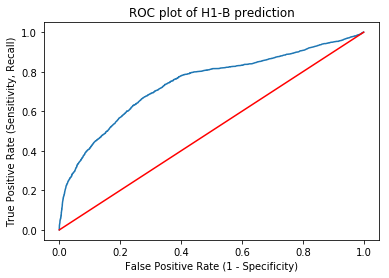

In [16]:
model.plot_roc(v_probs, y_test, "ROC plot of H1-B prediction", "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [19]:
    mo.fit(X, y_train)
    
    print('roc_auc_score:')

roc_auc_score:


In [20]:
#import again?
import sklearn.metrics as skm
import pandas as pd
print(skm.roc_auc_score(y_test,mo.predict_proba(X_test)))
print()
pd.crosstab(y_test, mo.predict(X_test))

0.7149048686839812



col_0,0,1
row_0,,
0,159576,511
1,2090,154


In [12]:
v_probs = mo.predict_proba(X_test)

In [13]:
v_probs

array([0.00064982, 0.        , 0.        , ..., 0.        , 0.0062    ,
       0.        ])

/home/ji/Downloads/create_features_DF.py:199: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/home/ji/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/ji/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


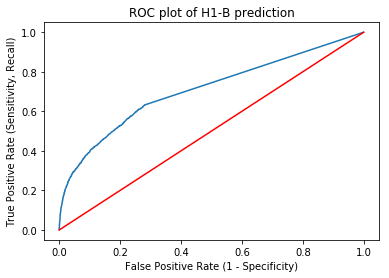

In [14]:
#change roc plot code?
model.plot_roc(v_probs, y_test, "ROC plot of H1-B prediction", "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")